<h1><u>Capstone 2 - Coffee Shop - Pre-processing and Training Data Development</u>

In previous notebooks I have already defined my problem, and cleaned the data set. The data set is from Kaggle and can be found [here](https://www.kaggle.com/datasets/patkle/coffeereviewcom-over-7000-ratings-and-reviews). The previously completed data cleaning notebook can be found [here](https://github.com/lindseyc735/Springboard/blob/main/Capstone%202/Capstone_2_data_wrangling.ipynb). Please see the below review of the project prior to considering the exploratory data analysis.

<u>**Problem Statement:**</u>
<br>What features most affect the coffee rating?

<u>**Context:**</u>
<br>A start-up coffee company is creating their signature blend to sell alongside the more generic blends of coffee. The start-up needs to know what three features to primarily incorporate into their signature blend to maximize its popularity and distinguish their company from other coffee companies.

<u>**Criteria for Success:**</u>
<br>Determine the three coffee features that will create a popular, signature blend of coffee.

<u>**Scope of Solution Space:**</u>
<br>Rating
<br>Acidity
<br>Aftertaste
<br>Aroma
<br>Body
<br>Flavor
<br>Review description
<br>Country of origin
<br>Roast level
<br>Roaster
<br>Roaster location

Driving our exploration, consider the following hypotheses:  

<u>Null Hypothesis:</u> The three features that most affect the coffee rating are acidity_structure, roast_level, and country_origin. 
  
<u>Alternate Hypothesis:</u> The three features that most affect the coffee rating are not acidity_structure, roast_level, and country_origin.

In [1]:
import warnings
warnings.filterwarnings('ignore') # Removes deprecation warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
from pandas_profiling import ProfileReport # Creates data description, visuals, and missing value statistics for the data frame
from IPython.display import display
import os
# Import the data and run a ProfileReport to find statistical descriptions, visuals, and missing value information
coffee3 = pd.read_csv('coffee3.csv')
coffee3.head()

,rating,acidity_structure,aftertaste,aroma,body,flavor,agtron,coffee_origin,est_price,roast_level,roaster,roaster_location
0,93,9.0,8.0,9.0,8.0,9.0,60/78,"Caranavi, Bolivia",$30.00/12 ounces,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia"
1,92,8.0,8.0,9.0,8.0,9.0,60/78,"Matagalpa growing region, Nicaragua",$160.00/12 ounces,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio"
2,94,9.0,8.0,9.0,9.0,9.0,59/77,"Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,Medium-Light,Mostra Coffee,"San Diego, California"
3,94,9.0,8.0,9.0,9.0,9.0,60/77,"Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,Medium-Light,Regent Coffee,"Glendale, California"
4,93,9.0,8.0,9.0,8.0,9.0,60/77,"La Sierra, Cauca Department, Colombia",$18.99/8 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia"


In [2]:
# Review the feature datatypes 
coffee3.dtypes

rating                 int64
acidity_structure    float64
aftertaste           float64
aroma                float64
body                 float64
flavor               float64
agtron                object
coffee_origin         object
est_price             object
roast_level           object
roaster               object
roaster_location      object
dtype: object

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'acidity_structure'}>],
       [<AxesSubplot:title={'center':'aftertaste'}>,
        <AxesSubplot:title={'center':'aroma'}>],
       [<AxesSubplot:title={'center':'body'}>,
        <AxesSubplot:title={'center':'flavor'}>]], dtype=object)

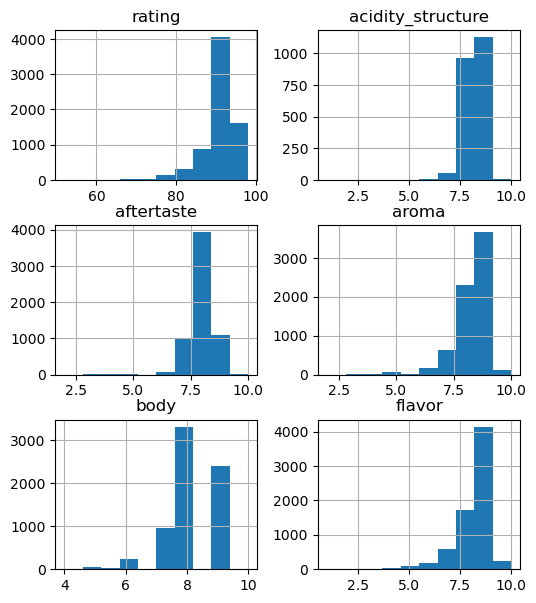

In [3]:
# View histograms of the numeric features 
coffee3.hist(figsize=(6, 7))

# Preprocessing and Training Data Development  
Goal: Create a cleaned development dataset you can use to complete the modeling step of your project.  
  
Steps:  
- Create dummy features
- Standardize the magnitude of numeric features using a scaler
- Split data into training and testing datasets

# Create dummy or indicator features for categorical variables
Hint: you’ll need to think about your old favorite pandas functions here like
get_dummies() .  
- Consult [this](https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40) guide for help.  

In [4]:
# Select the 'object' features
coffee3_objects = coffee3.select_dtypes(include=['object'])

# Create dummy features for the 'object' features
dummy = pd.get_dummies(coffee3_objects)

# Drop the original 'object' features, and concatenate the the numeric features in the original dataset with the dummy features
coffee3 = pd.concat([coffee3.drop(coffee3_objects, axis=1), dummy], axis=1)

# Standardize the magnitude of numeric features using a scaler  
Hint: you might need to employ Python code like this:  
<u>Making a Scaler object</u>  
scaler = preprocessing.StandardScaler()  
<u>Fitting data to the scaler object</u>  
scaled_df = scaler.fit_transform(df)  
scaled_df = pd.DataFrame(scaled_df, columns=names)  


In [5]:
# Isolate the features that are int64 or float64 to avoid standardizing the dummy variables
coffee3_numeric = coffee3.select_dtypes(include=['int64', 'float64'])

# Import StandardScaler()
from sklearn.preprocessing import StandardScaler

# Make a scaler object
scaler = StandardScaler()

# Fit the scaler on the data and transform it
scaled_coffee3 = scaler.fit_transform(coffee3_numeric)

# Convert the scaled_data array back to a DataFrame
scaled_coffee3 = pd.DataFrame(scaled_coffee3, columns=coffee3_numeric.columns)

In [6]:
# Drop the original numeric features
preprocessed_coffee3 = coffee3.drop(coffee3_numeric, axis=1)

#Concatenate the standardized features with the dummy features
preprocessed_coffee3 = pd.concat([scaled_coffee3, preprocessed_coffee3], axis=1)

In [7]:
preprocessed_coffee3.shape

(7037, 7129)

# Split into testing and training datasets
First I'll need to reorder my data so that my target feature is the last column.

In [8]:
# Set rating as the target column
target_column_name = 'rating'

# Get all column names except the target column
other_column_names = [col for col in preprocessed_coffee3.columns if col != target_column_name]

# Reorder the columns such that the target column is the last column
ordered_columns = other_column_names + [target_column_name]

# Create a new DataFrame with columns in the desired order
reordered_preprocessed_coffee3 = preprocessed_coffee3[ordered_columns]

reordered_preprocessed_coffee3.head()

,acidity_structure,aftertaste,aroma,body,flavor,agtron_/,agtron_/36,agtron_/44,agtron_/54,agtron_/55,...,"roaster_location_Youngstown, Ohio","roaster_location_Yuanlin, Taiwan","roaster_location_Yun-Lin County, Taiwan","roaster_location_Zhongli, Taiwan","roaster_location_Zhubei City, Taiwan","roaster_location_Zhubei, Taiwan","roaster_location_Zhuwei, Taiwan",roaster_location_Zimbabwe,"roaster_location_Zurich, Switzerland",rating
0,0.813684,0.043515,0.698022,-0.111478,0.553888,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.517301
1,-0.774100,0.043515,0.698022,-0.111478,0.553888,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.274650
2,0.813684,0.043515,0.698022,1.056676,0.553888,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.759951
3,0.813684,0.043515,0.698022,1.056676,0.553888,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.759951
4,0.813684,0.043515,0.698022,-0.111478,0.553888,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.517301


In [9]:
#Save the reordered and preprocessed data set
reordered_preprocessed_coffee3.to_csv('reordered_preprocessed_coffee3.csv', index=False)

Next, apply the sklearn feature train_test_split()

In [10]:
from sklearn.model_selection import train_test_split

X = reordered_preprocessed_coffee3.iloc[:, :-1]  # Features (all columns except the last one)
y = reordered_preprocessed_coffee3.iloc[:, -1]   # Target (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Save the data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
